# Milestones 1

---

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Phase 1 dalam konsep Supervised Learning.


## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Marketing](https://accurate.id/wp-content/uploads/2021/12/tujuan-marketing.png)

### Dataset

Dataset yang digunakan pada pada project ini adalah dataset terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ya ('**Yes**') atau tidak ('**No**') berlangganan. Dataset ini berisi 41188 baris dengan 21 kolom yang diantaranya adalah age, job, marital, education, housing, loan, contact, dan masih banyak lagi. Dataset dapat dilihat di [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

Keterangan dari kolom dataset ini adalah:

| Feature        | Description                                                                                                                                                                                                                                                                                                                                                                                                        |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| age            | person's age                                                                                                                                                                                                                                                                                                                                                                                                       |
| job            | type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')                                                                                                                                                                                                                            |
| marital        | marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)                                                                                                                                                                                                                                                                                               |
| education      | (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')                                                                                                                                                                                                                                                                              |
| default        | has credit in default? (categorical: 'no', 'yes', 'unknown')                                                                                                                                                                                                                                                                                                                                                       |
| housing        | has housing loan? (categorical: 'no', 'yes', 'unknown')                                                                                                                                                                                                                                                                                                                                                            |
| loan           | has personal loan? (categorical: 'no', 'yes', 'unknown')                                                                                                                                                                                                                                                                                                                                                           |
| contact        | contact communication type (categorical: 'cellular', 'telephone')                                                                                                                                                                                                                                                                                                                                                  |
| month          | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                   |
| day_of_week    | last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')                                                                                                                                                                                                                                                                                                                                      |
| duration       | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| campaign       | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                                                             |
| pdays          | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                                                                                                                                                                                                                                |
| previous       | number of contacts performed before this campaign and for this client (numeric)                                                                                                                                                                                                                                                                                                                                    |
| poutcome       | outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')                                                                                                                                                                                                                                                                                                                      |
| emp.var.rate   | employment variation rate - quarterly indicator (numeric)                                                                                                                                                                                                                                                                                                                                                          |
| cons.price.idx | consumer price index - monthly indicator (numeric)                                                                                                                                                                                                                                                                                                                                                                 |
| cons.conf.idx  | consumer confidence index - monthly indicator (numeric)                                                                                                                                                                                                                                                                                                                                                            |
| euribor3m      | euribor 3 month rate - daily indicator (numeric)                                                                                                                                                                                                                                                                                                                                                                   |
| nr.employed    | number of employees - quarterly indicator (numeric)                                                                                                                                                                                                                                                                                                                                                                |
| y              | has the client subscribed a term deposit? (binary: 'yes', 'no')                                                                                                                                                                                                                                                                                                                                                    |

### Objectives

**Milestones 1** ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import warnings
warnings.filterwarnings("ignore") 

Pada milestone 1 ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **Scikit-Learn**, dan **XGBoost**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from xgboost import XGBClassifier # Extreme Gradient Boosting
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [4]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `bank` dari file `bank-additional-full.csv` dengan separator "**;**".

In [5]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Characteristics

In [7]:
bank.shape

(41188, 21)

Dataset ini memiliki **41188 baris** dengan **21 kolom**.

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari basic info ini dapat diketahui datafrane terbentuk dari:
- 5 kolom dengan tipe **float**
- 5 kolom dengan tipe **integer**
- 11 kolom dengan tipe **object**

Jika dilihat dari basic info ini sepertinya tidak ada missing value pada dataframe. Namun pada keterangan dari kolom tabel menyebutkan bahwa ada value **unknown** yang mana ini adalah missing value, maka nilai-nilai ini akan di eksplorasi lebih jauh pada bagian **EDA**.

In [9]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Jika dilihat dari summary statistics terdapat anomali pada kolom `age`, `duration`, `pdays`, dan `emp.var.rate` karena nilai minimumnya jauh dari quartile pertamanya. Maka, akan dilihat lebih detail pada bagian **EDA**.

## Data Cleaning

### Missing Values

Akan dilakukan pengecekan terhadap missing value.

In [10]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Walaupun tidak terdapat missing value, tapi pada dataset ini terdapat value **unknown** dalam bentuk string yang dapat diartikan sebagai missing value dan akan dilihat lebih jauh pada bagian **EDA**.

### Duplicated Data

pada bagian ini akan dilakukan pengecekan terhadap data duplikat.

In [11]:
bank.duplicated().sum()

12

Ditemukan ada **12 baris** data duplikat pada dataset.

In [12]:
bank[bank.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Tabel diatas adalah data duplikat yang ditemukan, semua **data duplikat akan dihapus** dari dataframe.

In [13]:
bank = bank.drop_duplicates(keep='first')

In [14]:
bank.duplicated().sum()

0

Sekarang sudah tidak lagi terdapat data duplikat pada dataframe.

### Column Rename

Pada bagian ini akan mengubah nama kolom pada dataframe seperti contohnya `emp.var.rate` akan diubah menjadi `emp_var_rate` agar memudahkan saat pemanggilan kolom.

In [15]:
bank = bank.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed', 'y': 'subscribed'})

In [16]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**NOTE**: nama kolom `y` diubah menjadi `subscribed` agar lebih merepresentasikan value pada kolomnya.

## Exploratory Data Analysis

### Subscribed (Target Label)

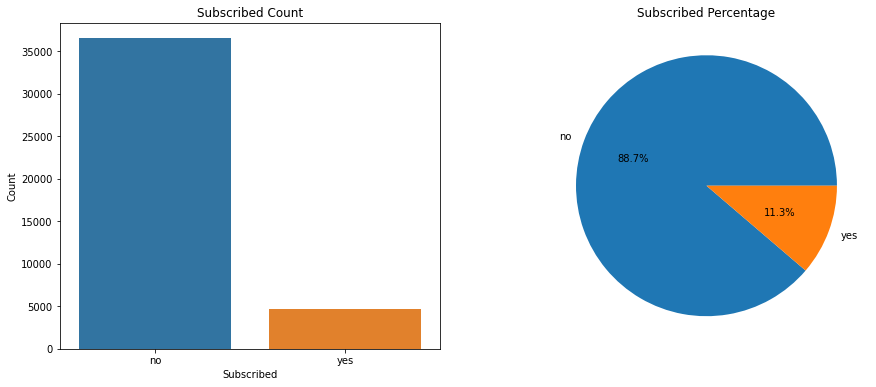

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='subscribed', data=bank)
plt.title('Subscribed Count')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(bank.subscribed.value_counts(), labels=bank.subscribed.value_counts().index, autopct='%1.1f%%')
plt.title('Subscribed Percentage')
plt.show()

Kebanyakan dari orang **tidak** berlangganan dengan persentase orang yang berlangganan produk deposito bank hanya sekitar **11%** saja.

### Age

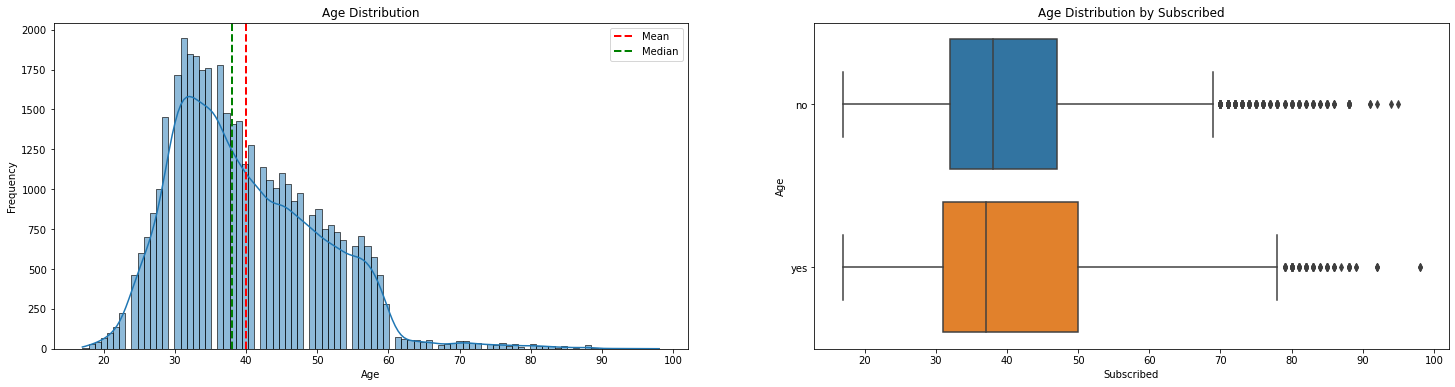

Skewness: 0.7845602604159753
Minumum Age: 17
Maximum Age: 98


In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=bank, kde=True)
plt.axvline(bank.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(bank.age.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='age', y='subscribed', data=bank)
plt.title('Age Distribution by Subscribed')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.show()
print(f'Skewness: {bank.age.skew()}')
print(f'Minumum Age: {bank.age.min()}')
print(f'Maximum Age: {bank.age.max()}')

Kolom `age` memiliki nilai skewness sebesar 0.785 yang berarti distribusi dari kolom ini Skewed dan jika dilihat dari bentuk histogramnya distribusi dari kolom ini adalah **Right-Skewed**. Usia paling muda adalah **17 tahun** dan usia paling tua adalah **98 tahun**, yang jika dilihat dari box plot rentang usia dari orang yang berlangganan dan yang tidak berlangganan perbedaannya hanya sedikit.

### Job

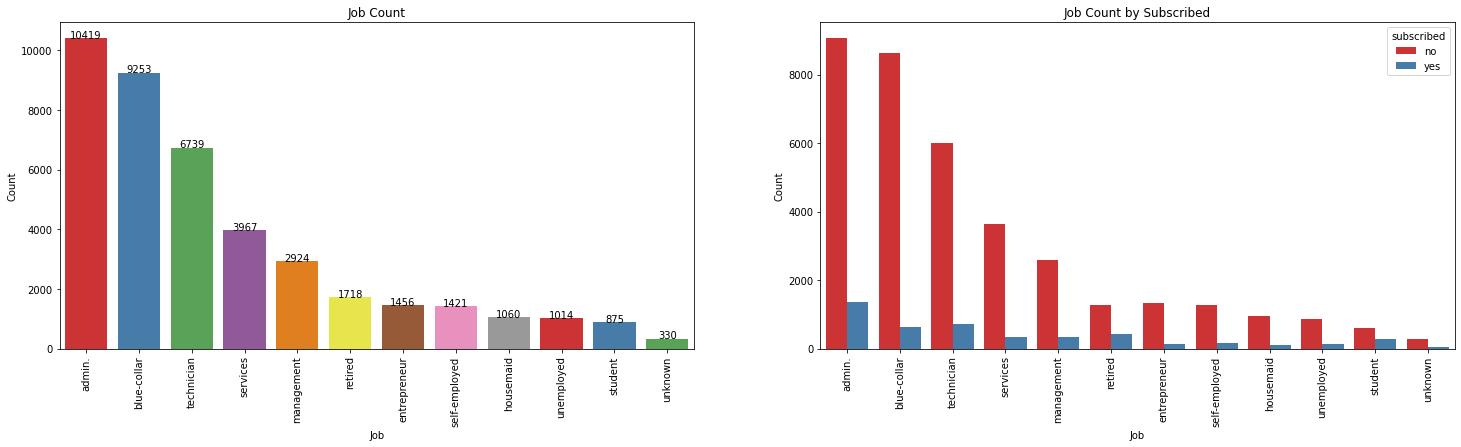

In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='job', data=bank, order=bank.job.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Job Count')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='job', data=bank, order=bank.job.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Job Count by Subscribed')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Kebanyakan dari klien bank ini adalah seorang **admin** dan pekerja **kerah biru**, ada juga yang merupakan seorang **pelajar** walaupun jumlahnya sedikit. Dan pada kolom `job` ini terdapat value **unknown** sebanyak 330 baris data maka akan dilihat korelasi dari kolom `job` terhadap kolom `subscribed` jika kedua kolom ini memiliki korelasi maka akan dilakukan imputasi dan jika tidak kolom ini tidak akan digunakan sebagai feature. 

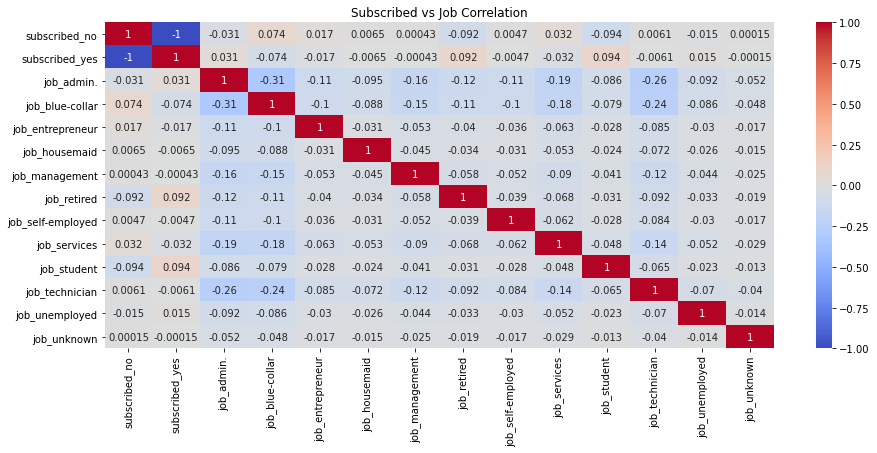

In [20]:
plt.figure(figsize=(15, 6))
sns.heatmap(pd.get_dummies(bank[['subscribed', 'job']]).corr(), annot=True, cmap='coolwarm')
plt.title('Subscribed vs Job Correlation')
plt.show()

Dari hasil pengecekan menggunakan heatmap kedua kolom ini **tidak memiliki korelasi**, maka kolom `job` ini tidak akan digunakan sebagai feature.

### Marital

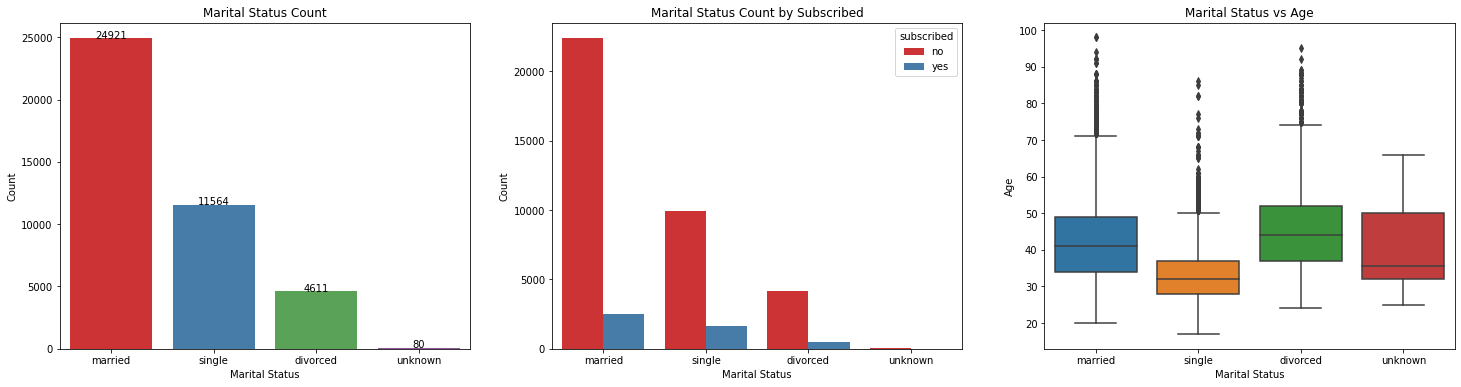

In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='marital', data=bank, order=bank.marital.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.countplot(x='marital', data=bank, order=bank.marital.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Marital Status Count by Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.boxplot(x='marital', y='age', data=bank)
plt.title('Marital Status vs Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

Klien bank ini kebanyakan adalah orang yang sudah menikah yang berjumlah **24921 klien** dengan rentang usia dari 20 hingga 70 tahun dan ada juga yang lebih dari 90 tahun. Dari sini dapat terlihat ada 80 klien yang tidak menyertakan status pernikahannya yang berjumlah 80 klien.

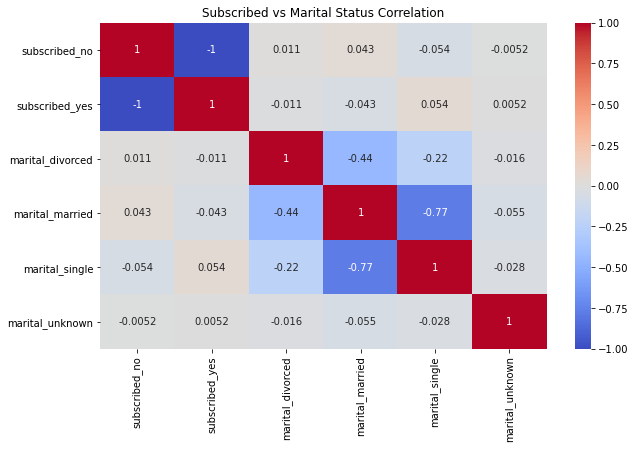

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.get_dummies(bank[['subscribed', 'marital']]).corr(), annot=True, cmap='coolwarm')
plt.title('Subscribed vs Marital Status Correlation')
plt.show()

Dari heatmap diatas kolom `marital` tidak berkorelasi dengan kolom `subscribed` maka missing value pada kolom ini akan dibiarkan karena tidak akan dijadikan feature.

### Education

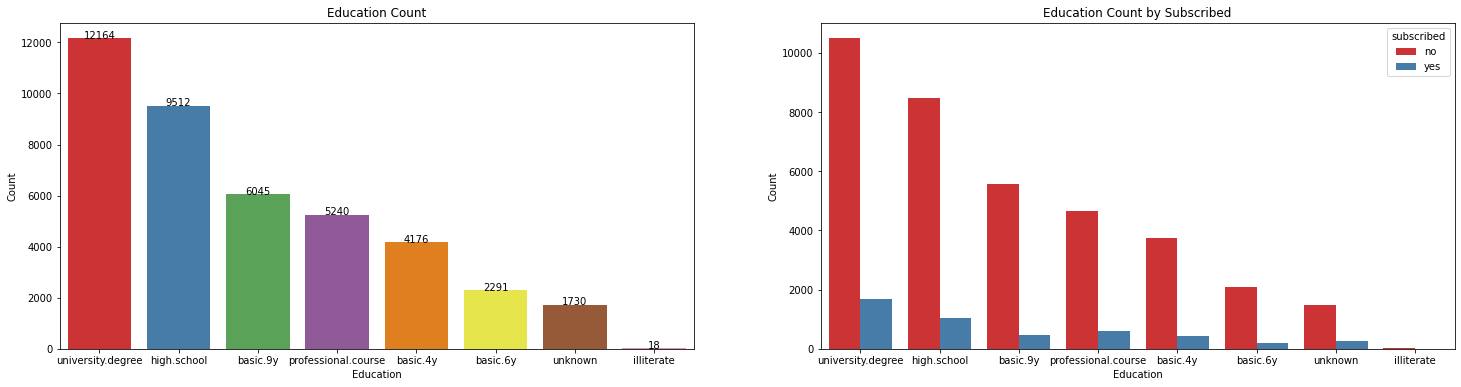

In [23]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='education', data=bank, order=bank.education.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Education Count')
plt.xlabel('Education')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='education', data=bank, order=bank.education.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Education Count by Subscribed')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [24]:
pd.crosstab(bank.education, bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
basic.6y,151,1425,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2680,357,872,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3317,142,12
university.degree,5750,94,610,139,2063,284,765,173,170,1809,262,45
unknown,249,454,57,42,123,97,29,150,167,212,19,131


Klien di bank ini kebanyakan adalah orang-orang dengan gelar sarjana yang berjumlah **12164 klien** dan ada **1730 klien yang tidak menyertakan data pendidikan** terakhirnya.

Namun, dari tabel diatas dapat diketahui diantara 1739 klien yang tidak menyertakan data pendidikannya kebanyakan dari meraka adalah pekerja kerah biru (**blue-collar**) dengan jumlah 454 klien dan **ada 131 klien yang tidak diketahui pendidikan dan pekerjaannya**.

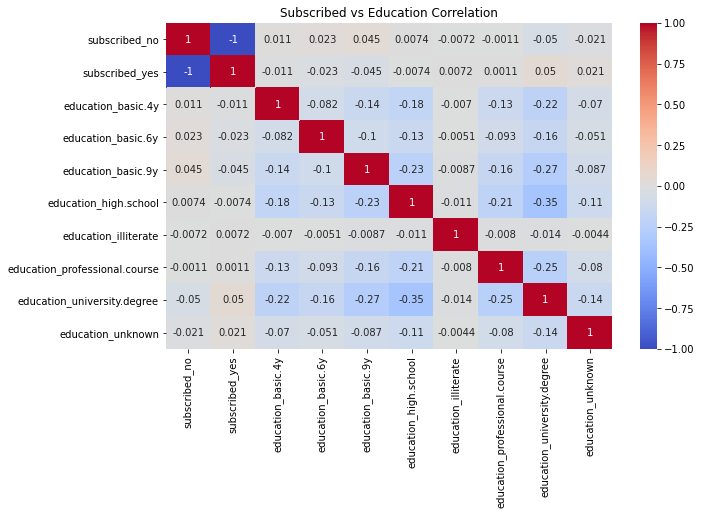

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.get_dummies(bank[['subscribed', 'education']]).corr(), annot=True, cmap='coolwarm')
plt.title('Subscribed vs Education Correlation')
plt.show()

Dan kolom `education` tidak memiliki korelasi dengan kolom `subscribed` maka kolom ini tidak akan digunakan sebagai feature dan mising value pada kolom ini akan dibiarkan.

### Contact

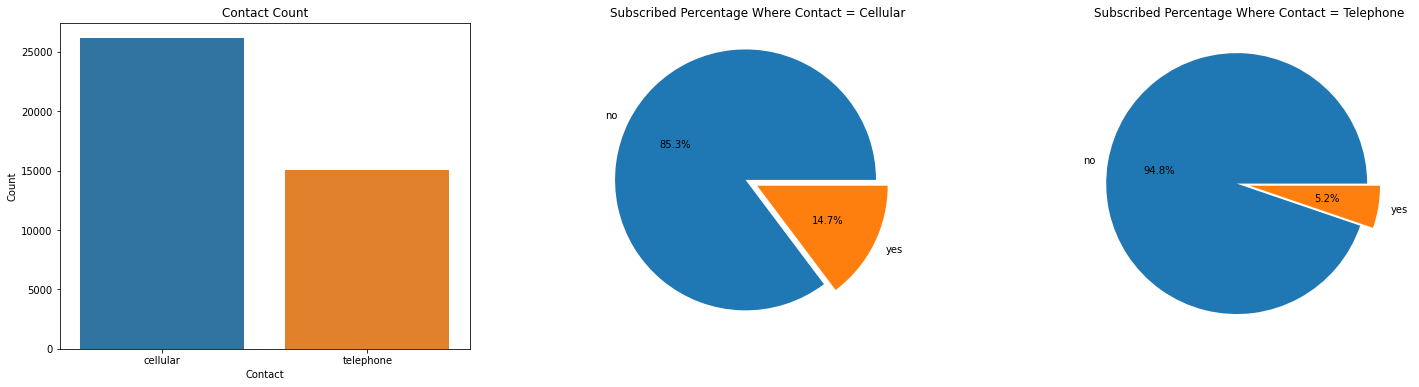

In [26]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='contact', data=bank, order=bank.contact.value_counts().index)
plt.title('Contact Count')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(bank[bank.contact == 'cellular'].subscribed.value_counts(), labels=bank[bank.contact == 'cellular'].subscribed.value_counts().index, autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Subscribed Percentage Where Contact = Cellular')
plt.subplot(1, 3, 3)
plt.pie(bank[bank.contact == 'telephone'].subscribed.value_counts(), labels=bank[bank.contact == 'telephone'].subscribed.value_counts().index, autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Subscribed Percentage Where Contact = Telephone')
plt.show()

Bank ini lebih banyak melakukan marketing dengan mengkontak klien menggunakan **cellular** yang mana hal ini cukup baik karena persentase klien yang berlangganan lebih besar yaitu sekitar **15%** sedangkan persentase klien berlangganan yang dikontak menggunakan **telephone** hanya sekitar **5%** saja. 

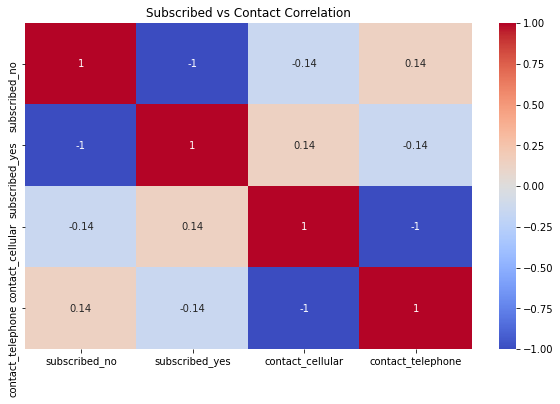

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.get_dummies(bank[['subscribed', 'contact']]).corr(), annot=True, cmap='coolwarm')
plt.title('Subscribed vs Contact Correlation')
plt.show()

Dan jika dilihat dari heatmap diatas, kolom `contact` ini memiliki korelasi dengan kolom `subscribed`. Maka, `contact` akan digunakan sebagai feature.

### Month & Day

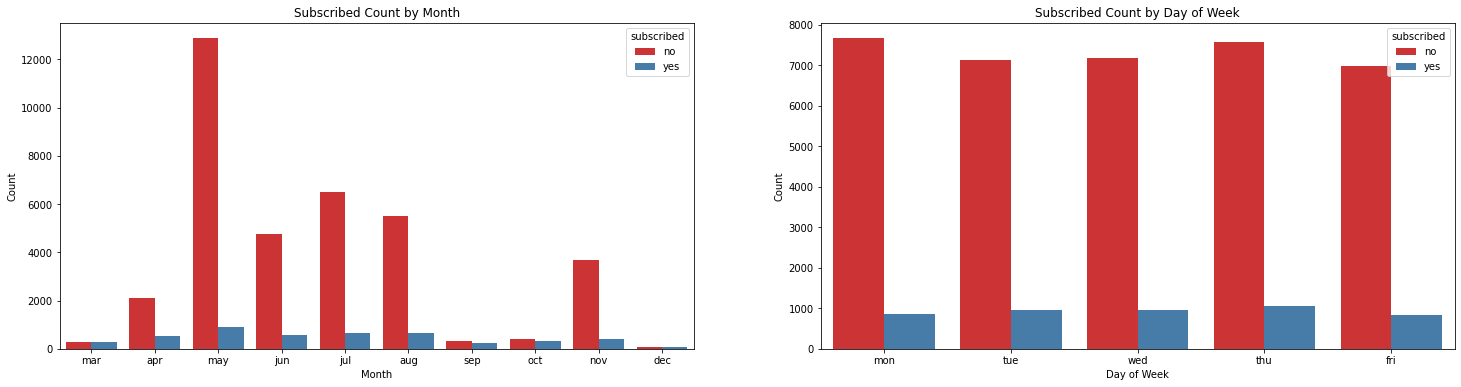

In [28]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='month', data=bank, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='Set1', hue='subscribed')
plt.title('Subscribed Count by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=bank, order=['mon', 'tue', 'wed', 'thu', 'fri'], palette='Set1', hue='subscribed')
plt.title('Subscribed Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

Bank memulai kampanye pemasaran mulai dari **bulan maret hingga bulan desember** pada hari **senin hingga jumat** dan puncaknya berada pada bulan mei, namun jika dilihat dari grafik diatas pada bulan **maret**, **september**, dan **oktober** memiliki **persentase klien yang berlangganan lebih banyak** ketimbang bulan-bulan lainnya. 

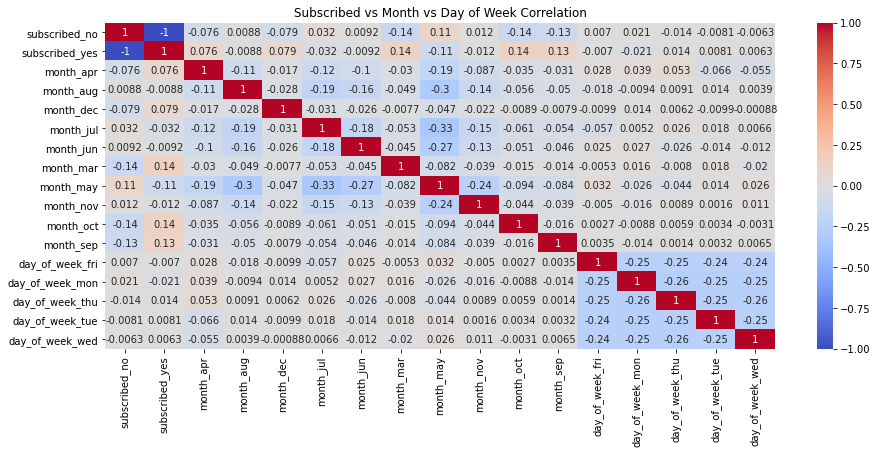

In [29]:
plt.figure(figsize=(15, 6))
sns.heatmap(pd.get_dummies(bank[['subscribed', 'month', 'day_of_week']]).corr(), annot=True, cmap='coolwarm')
plt.title('Subscribed vs Month vs Day of Week Correlation')
plt.show()

Dari heatmap diatas sepertinya kolom `month` memiliki korelasi dengan kolom `subscribed` sedangkan untuk kolom `day_of_week` tidak karena nilai correlationnya mendekati 0. Maka, kolom `month` akan digunakan sebagai feature.

### Duration

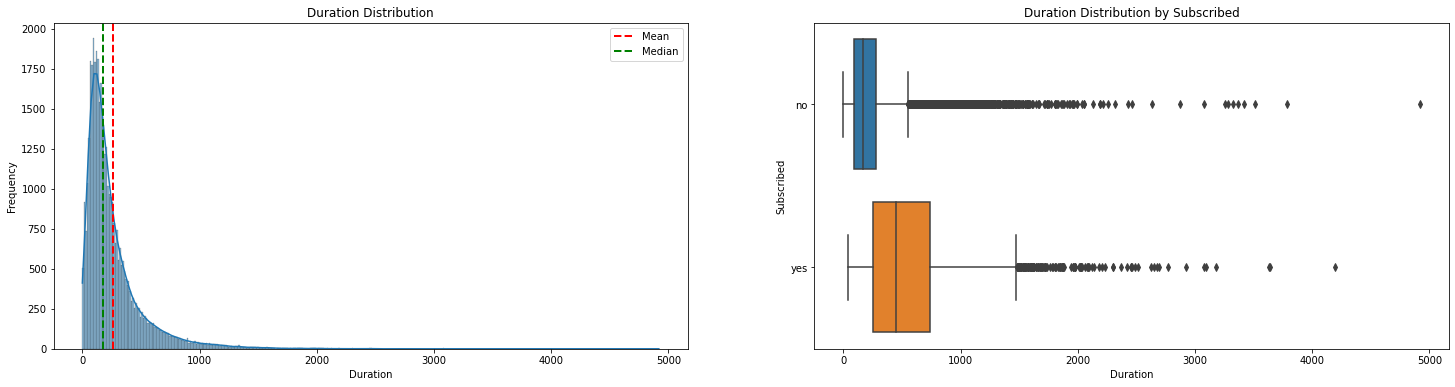

Skewness: 3.2628075094947224
Mean: 258.3158150378861
Median: 180.0


In [30]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='duration', data=bank, kde=True)
plt.axvline(bank.duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(bank.duration.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='duration', y='subscribed', data=bank)
plt.title('Duration Distribution by Subscribed')
plt.xlabel('Duration')
plt.ylabel('Subscribed')
plt.show()
print(f'Skewness: {bank.duration.skew()}')
print(f'Mean: {bank.duration.mean()}')
print(f'Median: {bank.duration.median()}')


Kolom `duration` ini adalah **durasi dalam satuan detik** saat pihak bank menghubungi klien. Rata-rata pihak bank menghubungi klien selama **258 detik** atau sekitar 4 menit lebih dan dari box plot dapat diketahui klien yang berlangganan memiliki **durasi yang lebih lama** dari klien yang tidak berlangganan, namun uniknya ada klien yang walaupun durasinya hampir 5000 detik atau sekitar 1 jam lebih tetap tidak berlangganan.

**NOTE**: pada keterangan kolom dataset disebutkan bahwa kolom `duration` ini **sangat mempengaruhi outputnya** (`subscribed`) dimana jika **duration = 0** maka outputnya akan **no**, tetapi jika pihak bank tidak menghubungi klien mereka tidak akan pernah mengetahui outputnya akan berlangganan atau tidak. Maka, kolom duration ini tidak akan digunakan sebagai feature karena takutnya akan mendistorsi model.

### Pdays & Poutcome

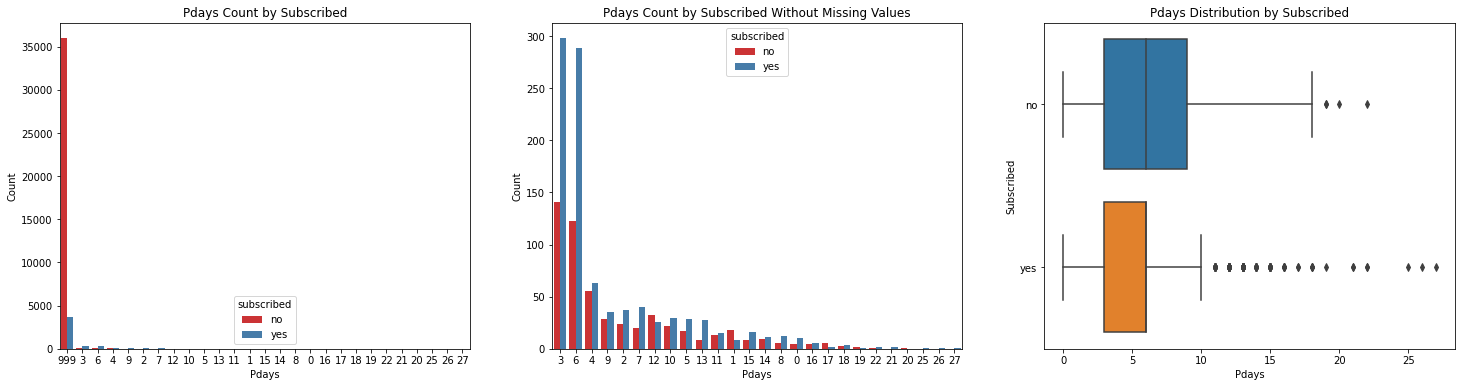

In [31]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='pdays', data=bank, order=bank.pdays.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Pdays Count by Subscribed')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.countplot(x='pdays', data=bank[bank.pdays != 999], order=bank[bank.pdays != 999].pdays.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Pdays Count by Subscribed Without Missing Values')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.boxplot(x='pdays', y='subscribed', data=bank[bank.pdays != 999])
plt.title('Pdays Distribution by Subscribed')
plt.xlabel('Pdays')
plt.ylabel('Subscribed')
plt.show()

Pada keterangan kolom dijelaskan bahwa klien yang tidak dihubungi oleh pihak bank memiliki value **999**.

In [32]:
print(f'Number of customers who have not been contacted: {bank.pdays.value_counts()[999]}')
print(f'Percentage of customers who have not been contacted: {(bank.pdays.value_counts()[999] / bank.shape[0] * 100):.2f}%')

Number of customers who have not been contacted: 39661
Percentage of customers who have not been contacted: 96.32%


Ada **39661 klien** atau sekitar **96%** klien tidak dihubungi oleh pihak bank.

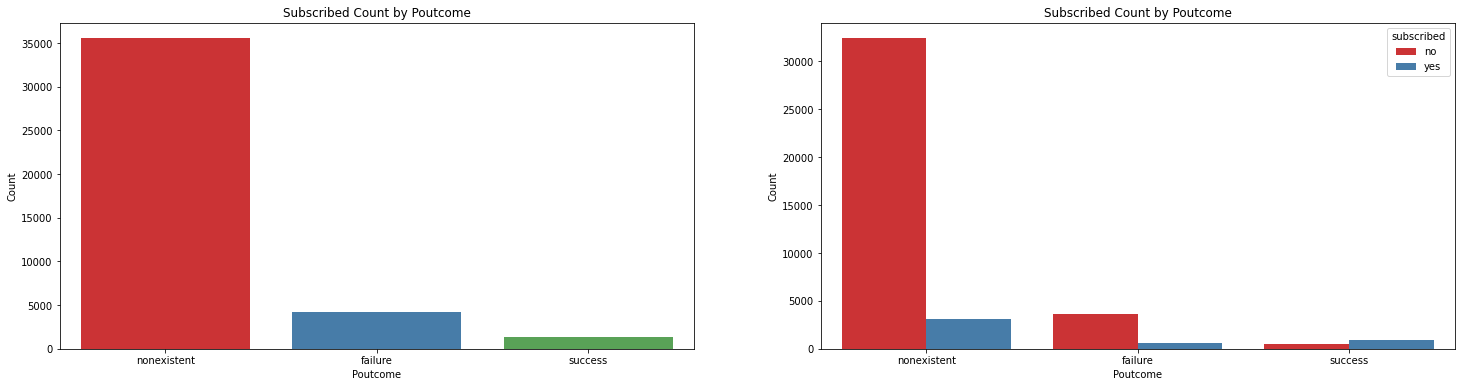

In [33]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='poutcome', data=bank, order=bank.poutcome.value_counts().index, palette='Set1')
plt.title('Subscribed Count by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='poutcome', data=bank, order=bank.poutcome.value_counts().index, palette='Set1', hue='subscribed')
plt.title('Subscribed Count by Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.show()

In [34]:
print(f"Number of nonexistent poutcome: {bank.poutcome.value_counts()['nonexistent']}")
print(f"Percentage of nonexistent poutcome: {(bank.poutcome.value_counts()['nonexistent'] / bank.shape[0] * 100):.2f}%")

Number of nonexistent poutcome: 35551
Percentage of nonexistent poutcome: 86.34%


Sama seperti kolom `pdays`, kolom `poutcome` ini **86%** valuenya adalah **nonexistent**. 

In [35]:
pd.crosstab(bank.poutcome, bank.pdays)

pdays,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,999
poutcome,,,,,,,,,,,,,,,,,,,,,,,,,,,
failure,0,0,0,4,2,4,25,15,6,24,7,3,13,8,5,9,2,5,5,1,1,2,0,1,0,0,4110
nonexistent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35551
success,15,26,61,435,116,42,387,45,12,40,45,25,45,28,15,15,9,3,2,2,0,0,3,0,1,1,0


Dari tabel diatas dapat diketahui bahwa kolom `poutcome` yang valuenya **nonexistent** memiliki value **999** pada kolom **pdays** atau dapat diartikan klien yang tidak ada outcomenya itu karena mereka belum dihubungi oleh pihak bank.

Maka, kolom `poutcome` dan `pdays` akan tetep digunakan sebagai feature karena pada kasus ini missing valuenya **tidak random**.

### Correlation Between Numeric Column To Subscribed

Text(0.5, 1.0, 'Correlation Matrix')

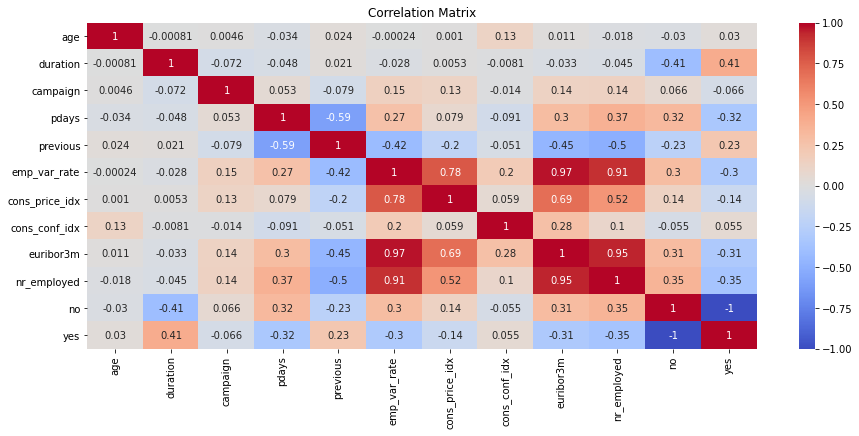

In [36]:
plt.figure(figsize=(15, 6))
sns.heatmap(pd.concat([bank, pd.get_dummies(bank.subscribed)], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Dari heatmap map diatas, maka kolom yang akan digunakan sebagai features adalah kolom yang memiliki nilai correlation diatas **0.2** yaitu `pdays`, `previous`, `emp_var_rate`, `euribor3m`, dan `nr_employed`.

Sedangkan untuk kolom `duration` tidak akan digunakan sebagaimana yang dijelaskan pada bagian EDA. Maka, kolom numerik yang tidak akan digunakan sebagai features akan dihapus dari dataframe.

In [37]:
bank = bank.drop(columns=['age', 'duration', 'campaign', 'cons_price_idx', 'cons_conf_idx'])

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job           41176 non-null  object 
 1   marital       41176 non-null  object 
 2   education     41176 non-null  object 
 3   default       41176 non-null  object 
 4   housing       41176 non-null  object 
 5   loan          41176 non-null  object 
 6   contact       41176 non-null  object 
 7   month         41176 non-null  object 
 8   day_of_week   41176 non-null  object 
 9   pdays         41176 non-null  int64  
 10  previous      41176 non-null  int64  
 11  poutcome      41176 non-null  object 
 12  emp_var_rate  41176 non-null  float64
 13  euribor3m     41176 non-null  float64
 14  nr_employed   41176 non-null  float64
 15  subscribed    41176 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 6.3+ MB


### Correlation Between Categorical Column To Subscribed

In [39]:
cat_corr = pd.get_dummies(bank[['subscribed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,subscribed_no,subscribed_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
subscribed_no,1.000000,-1.000000,-0.031301,0.074431,0.016651,0.006510,0.000426,-0.092364,0.004668,0.032262,-0.093962,0.006069,-0.014749,0.000154,0.010593,0.043476,-0.054209,-0.005210,0.010808,0.023493,0.045152,0.007408,-0.007246,-0.001071,-0.050267,-0.021476,-0.099356,0.099305,0.003042,0.011145,0.002275,-0.011804,-0.005136,0.002275,0.004478,-0.144774,0.144774,-0.031794,0.193522,-0.316302,-0.076188,0.008778,-0.079311,0.032344,0.009193,-0.144027,0.108278,0.011779,-0.137538,-0.126079,0.006989,0.021241,-0.013797,-0.008123,-0.006290
subscribed_yes,-1.000000,1.000000,0.031301,-0.074431,-0.016651,-0.006510,-0.000426,0.092364,-0.004668,-0.032262,0.093962,-0.006069,0.014749,-0.000154,-0.010593,-0.043476,0.054209,0.005210,-0.010808,-0.023493,-0.045152,-0.007408,0.007246,0.001071,0.050267,0.021476,0.099356,-0.099305,-0.003042,-0.011145,-0.002275,0.011804,0.005136,-0.002275,-0.004478,0.144774,-0.144774,0.031794,-0.193522,0.316302,0.076188,-0.008778,0.079311,-0.032344,-0.009193,0.144027,-0.108278,-0.011779,0.137538,0.126079,-0.006989,-0.021241,0.013797,0.008123,0.006290
job_admin.,-0.031301,0.031301,1.000000,-0.313351,-0.111434,-0.094610,-0.160917,-0.121447,-0.110038,-0.190041,-0.085760,-0.257470,-0.092481,-0.052315,0.020062,-0.120672,0.117948,-0.007920,-0.181285,-0.104475,-0.162670,0.122216,-0.009499,-0.161404,0.327175,-0.052556,0.121330,-0.121241,-0.004968,-0.008559,-0.008572,0.011159,-0.015487,-0.008572,0.020091,0.059157,-0.059157,0.002770,-0.015562,0.025073,-0.004965,0.074509,0.003324,-0.000002,-0.017930,0.015062,-0.055126,0.008685,0.006651,0.010408,0.009787,-0.000668,-0.003936,-0.001835,-0.003114
job_blue-collar,0.074431,-0.074431,-0.313351,1.000000,-0.103078,-0.087515,-0.148851,-0.112340,-0.101787,-0.175791,-0.079330,-0.238163,-0.085546,-0.048392,-0.056862,0.129248,-0.100162,-0.005255,0.265898,0.231031,0.372302,-0.173875,0.011009,-0.126495,-0.336621,0.018920,-0.176589,0.176708,-0.004596,0.014014,0.006658,-0.016007,0.003135,0.006658,-0.006169,-0.094617,0.094617,-0.013289,0.043887,-0.061426,-0.006241,-0.131318,-0.025347,0.027311,0.032955,-0.036978,0.136199,-0.062054,-0.048985,-0.054325,0.003315,-0.009742,-0.007097,-0.006748,0.020626
job_entrepreneur,0.016651,-0.016651,-0.111434,-0.103078,1.000000,-0.031122,-0.052934,-0.039950,-0.036197,-0.062515,-0.028211,-0.084696,-0.030422,-0.017209,0.006652,0.051055,-0.060248,0.000511,-0.004646,-0.005743,-0.001395,-0.031932,0.008577,-0.019843,0.051845,-0.002735,0.000991,-0.000957,-0.001634,-0.004553,0.000853,0.004276,0.004815,0.000853,-0.005473,-0.018883,0.018883,0.001576,0.007620,-0.017249,0.008585,-0.053174,-0.010775,0.006763,0.011352,-0.019896,-0.000782,0.054465,-0.010408,-0.009179,-0.001921,0.006823,0.005580,-0.007257,-0.003508
job_housemaid,0.006510,-0.006510,-0.094610,-0.087515,-0.031122,1.000000,-0.044942,-0.033919,-0.030732,-0.053076,-0.023952,-0.071908,-0.025829,-0.014611,0.020570,0.042496,-0.060975,0.003275,0.186175,0.012057,-0.026699,-0.025785,0.003937,-0.034923,-0.058533,-0.001938,-0.036835,0.036869,-0.001388,0.003633,0.003518,-0.004700,0.001341,0.003518,-0.002925,-0.010445,0.010445,-0.017870,0.014648,0.002267,-0.012998,0.021049,0.012286,0.022019,-0.000412,-0.010800,-0.018986,-0.009499

Sedangkan untuk kolom kategori, dari tabel korelasi diatas dan juga berdasarkan **EDA**, kolom ketegori yang memiliki korelasi dengan kolom `subscribed` adalah kolom `contact`, `month`, dan `poutcome`. Maka kolom-kolom tersebut akan digunakan sebagai feature dan kolom lainnya akan dihapus dari dataframe.

In [40]:
bank = bank.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week'])

In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contact       41176 non-null  object 
 1   month         41176 non-null  object 
 2   pdays         41176 non-null  int64  
 3   previous      41176 non-null  int64  
 4   poutcome      41176 non-null  object 
 5   emp_var_rate  41176 non-null  float64
 6   euribor3m     41176 non-null  float64
 7   nr_employed   41176 non-null  float64
 8   subscribed    41176 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 4.1+ MB


Setelah kolom-kolom yang tidak digunakan dihapus, sekarang dataframe hanya memiliki **8 kolom** saja dan 7 diantaranya akan menjadi features dan kolom `subscribed` yang akan menjadi target labelnya.

## Data Preprocessing

Sebelum data dipisahkan, akan dilakukan mapping terhadap labelnya (`subscribed`), dimana:
- **yes** akan menjadi **1**
- **no** akan menjadi **0**

In [42]:
bank['subscribed'] = bank['subscribed'].map({'yes': 1, 'no': 0})

### Split Data

Pada bagian ini akan dilakukan **splitting** terhadap dataset untuk dijadikan training, validation, dan testing set. Karena data ini jumlahnya sedikit yang hanya berjumlah 41176 baris maka data saja, maka akan displit dengan perbandingan **7:2:1**, dimana:
- 70% data menjadi **training set**
- 20% data menjadi **validation set**
- 10% data menjadi **testing set**

Dan pada splitting ini akan menggunakan parameter `stratify` untuk menjaga proporsi dari label.

In [43]:
df_train_val, df_test = train_test_split(bank, test_size=0.1, random_state=23, stratify=bank.subscribed)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=23, stratify=df_train_val.subscribed)

In [44]:
print(f'df_train proportion: {len(df_train) / len(bank):.1f}')
print(f'df_val proportion: {len(df_val) / len(bank):.1f}')
print(f'df_test proportion: {len(df_test) / len(bank):.1f}')

df_train proportion: 0.7
df_val proportion: 0.2
df_test proportion: 0.1


### Feature Engineering

#### Feature Selection

Berdasarkan hasil **EDA**, kolom yang akan dijadikan **features** adalah:
- `contact`
- `month`
- `pdays`
- `previous`
- `poutcome`
- `emp_var_rate`
- `euribor3m`
- `nr_employed`

Sedangkan kolom `subscribed` akan menjadi **label**.

In [45]:
X_train = df_train.drop(columns=['subscribed'])
y_train = df_train.subscribed
X_val = df_val.drop(columns=['subscribed'])
y_val = df_val.subscribed

#### Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan normalisasi data (**scaling**) menggunakan `StandardScaler()` dan melakukan **encoding** menggunakan `OneHotEncoder()` sekaligus untuk membuat model, dengan algoritma classification yang digunakan adalah **Logistic Regression**, **Support Vector Machine Classifier**, **Decision Tree Classifier**, **Random Forest Classifier**, **K-Nearest Neighbors Classifier** (KNN), **Naive Bayes Classifier**, dan **Extreme Gradient Boosting**.

Membuat pipeline untuk melakukan prepocessing features, dimana:
- `num_pipe` adalah pipeline untuk **scaling** features numerical menggunakan `StandardScaler()`
- `cat_pipe` adalah pipeline untuk **encoding** features categorical menggunakan `OneHotEncoder()`

Lalu, kedua pipeline akan digabungkan menjadi 1 pipeline **preprocessing** menggunakan `ColumnTransformer()`.

In [46]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

Membuat pipeline untuk melakukan preprocessing dan juga modeling.

In [47]:
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('preprocessing', preprocess), ('classifier', LogisticRegression(random_state=23))])

# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocess), ('classifier', SVC(random_state=23))])

# Decision Tree Pipeline
tree_pipe = Pipeline([('preprocessing', preprocess), ('classifier', DecisionTreeClassifier(random_state=23))])

# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocess), ('classifier', RandomForestClassifier(random_state=23))])

# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocess), ('classifier', KNeighborsClassifier(random_state=23))])

# Naive Bayes Pipeline
naive_pipe = Pipeline([('preprocessing', preprocess), ('classifier', GaussianNB(random_state=23))])

# Extreme Gradient Boosting Pipeline
xgb_pipe = Pipeline([('preprocessing', preprocess), ('classifier', XGBClassifier(verbosity = 0, silent=True, random_state=23))])

Membuat dictionary yang berisi **hyperparameter** untuk setiap model yang nantinya akan dicari parameter apa yang paling baik dengan menggunakan **grid search** untuk dataset yang digunakan dan menggunakan hyperparameter tersebut untuk melakukan prediksi.

In [48]:
# Logistic Regression
logistic_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['liblinear', 'saga'],
                   'classifier__max_iter': [1000, 10000]}

# SVC
svc_params = {'classifier__C': [0.1, 1, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6]}

# Random Forest
forest_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Naive Bayes
naive_params = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# Extreme Gradient Boosting
xgb_params = {'classifier__n_estimators': [100, 150, 200, 250, 300],
              'classifier__max_depth': [2, 3, 4, 5, 6],
              'classifier__learning_rate': [0.001, 0.01, 0.1, 1],
              'classifier__use_label_encoder': [False],
              'classifier__objective': ['binary:logistic']}

## Model Definition

Pada bagian ini akan dibuat 7 model, yaitu:
- `logistic` adalah model untuk **Logistic Regression**
- `svc` adalah model untuk **Support Vector Classifier**
- `tree` adalah model untuk **Decision Tree**
- `forest` adalah model untuk **Random Forest** 
- `knn` adalah model untuk **K-Nearest Neighbors**
- `naive` adalah model untuk **Naive Bayes**
- `xgb` adalah model untuk **Extreme Gradient Boosting**

Dimana semua model akan dituning menggunakan `GridSearchCV` dengan **5 Cross-Validation**.

In [49]:
logistic = GridSearchCV(logistic_pipe, param_grid=logistic_params, cv=5, n_jobs=-1)
svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1)
tree = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, n_jobs=-1)
forest = GridSearchCV(forest_pipe, param_grid=forest_params, cv=5, n_jobs=-1)
knn = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1)
naive = GridSearchCV(naive_pipe, param_grid=naive_params, cv=5, n_jobs=-1)
xgb = GridSearchCV(xgb_pipe, param_grid=xgb_params, cv=5, n_jobs=-1)

## Model Training

Sekarang setiap model akan dilatih dengan menggunakan `X_train` dan `y_train`, lalu mencari **estimator** paling baik yang kemudian akan digunakan untuk prediksi.

In [50]:
%timeit logistic.fit(X_train, y_train)
%timeit svc.fit(X_train, y_train)
%timeit tree.fit(X_train, y_train)
%timeit forest.fit(X_train, y_train)
%timeit knn.fit(X_train, y_train)
%timeit naive.fit(X_train, y_train)
%timeit xgb.fit(X_train, y_train)

1min 54s ± 5.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
3min 48s ± 6.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.5 s ± 757 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 8s ± 4.34 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.5 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
962 ms ± 71.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6min 6s ± 4.94 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
best_logistic = logistic.best_estimator_
print('-------Logistic Regression Best Hyperparameter-------')
print(logistic.best_params_)

best_svc = svc.best_estimator_
print('\n-------Support Vector Machine Best Hyperparameter-------')
print(svc.best_params_)

best_tree = tree.best_estimator_
print('\n-------Decision Tree Best Hyperparameter-------')
print(tree.best_params_)

best_forest = forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(forest.best_params_)

best_knn = knn.best_estimator_
print('\n-------K-Nearest Neighbors Best Hyperparameter-------')
print(knn.best_params_)

best_naive = naive.best_estimator_
print('\n-------Naive Bayes Best Hyperparameter-------')
print(naive.best_params_)

best_xgb = xgb.best_estimator_
print('\n-------Extreme Gradient Boosting Best Hyperparameter-------')
print(xgb.best_params_)

-------Logistic Regression Best Hyperparameter-------
{'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

-------Support Vector Machine Best Hyperparameter-------
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

-------Decision Tree Best Hyperparameter-------
{'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

-------Random Forest Best Hyperparameter-------
{'classifier__criterion': 'gini', 'classifier__max_features': 'log2', 'classifier__n_estimators': 300}

-------K-Nearest Neighbors Best Hyperparameter-------
{'classifier__algorithm': 'kd_tree', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}

-------Naive Bayes Best Hyperparameter-------
{'classifier__var_smoothing': 1}

-------Extreme Gradient Boosting Best Hyperparameter-------
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 6,

Setelah semua model dilatih, akan dibuat variable baru yang berisi model dengan hyperparameter terbaiknya yang nantinya digunakan untuk melakukan prediksi.

## Model Evaluation

Pada bagian akan dilakukan evaluasi untuk melihat performa dari setiap model yang sudah menggunakan best estimator berdasarkan hasil grid search. Metric evaluation yang akan digunakan adalah **F1-score** dan **ROC-AUC** score kerena terdapat **label imbalance** pada dataset.

Membuat dataframe `evaluations` untuk menyimpan score setiap model.

In [52]:
evaluations = pd.DataFrame(columns=['model', 'training_score', 'validation_score', 'macro_f1_score', 'roc_auc_score'])

Mengisi dataframe dengan score dari setiap model yang dibuat.

In [53]:
evaluations.loc[0] = ['Logistic Regression', round(best_logistic.score(X_train, y_train), 3), round(best_logistic.score(X_val, y_val), 3), round(f1_score(y_val, best_logistic.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_logistic.predict(X_val)), 3)]
evaluations.loc[1] = ['SVC', round(best_svc.score(X_train, y_train), 3), round(best_svc.score(X_val, y_val), 3), round(f1_score(y_val, best_svc.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_svc.predict(X_val)), 3)]
evaluations.loc[2] = ['Decision Tree', round(best_tree.score(X_train, y_train), 3), round(best_tree.score(X_val, y_val), 3), round(f1_score(y_val, best_tree.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_tree.predict(X_val)), 3)]
evaluations.loc[3] = ['Random Forest', round(best_forest.score(X_train, y_train), 3), round(best_forest.score(X_val, y_val), 3), round(f1_score(y_val, best_forest.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_forest.predict(X_val)), 3)]
evaluations.loc[4] = ['KNN', round(best_knn.score(X_train, y_train), 3), round(best_knn.score(X_val, y_val), 3), round(f1_score(y_val, best_knn.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_knn.predict(X_val)), 3)]
evaluations.loc[5] = ['Naive Bayes', round(best_naive.score(X_train, y_train), 3), round(best_naive.score(X_val, y_val), 3), round(f1_score(y_val, best_naive.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_naive.predict(X_val)), 3)]
evaluations.loc[6] = ['Extreme Gradient Boosting', round(best_xgb.score(X_train, y_train), 3), round(best_xgb.score(X_val, y_val), 3), round(f1_score(y_val, best_xgb.predict(X_val), average='macro'), 3), round(roc_auc_score(y_val, best_xgb.predict(X_val)), 3)]

Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` dan juga membuat list yang berisi confusion matrix untuk setiap model.

In [54]:
logistic_false_positive_rate_val, logistic_true_positive_rate_val, logistic_thresholds_val = roc_curve(y_val, best_logistic.predict(X_val))
svc_false_positive_rate_val, svc_true_positive_rate_val, svc_thresholds_val = roc_curve(y_val, best_svc.predict(X_val))
tree_false_positive_rate_val, tree_true_positive_rate_val, tree_thresholds_val = roc_curve(y_val, best_tree.predict(X_val))
forest_false_positive_rate_val, forest_true_positive_rate_val, forest_thresholds_val = roc_curve(y_val, best_forest.predict(X_val))
knn_false_positive_rate_val, knn_true_positive_rate_val, knn_thresholds_val = roc_curve(y_val, best_knn.predict(X_val))
naive_false_positive_rate_val, naive_true_positive_rate_val, naive_thresholds_val = roc_curve(y_val, best_naive.predict(X_val))
xgb_false_positive_rate_val, xgb_true_positive_rate_val, xgb_thresholds_val = roc_curve(y_val, best_xgb.predict(X_val))

confusions = [confusion_matrix(y_val, best_logistic.predict(X_val)),
              confusion_matrix(y_val, best_svc.predict(X_val)),
              confusion_matrix(y_val, best_tree.predict(X_val)),
              confusion_matrix(y_val, best_forest.predict(X_val)),
              confusion_matrix(y_val, best_knn.predict(X_val)),
              confusion_matrix(y_val, best_naive.predict(X_val)),
              confusion_matrix(y_val, best_xgb.predict(X_val))]

### Confusion Matrix

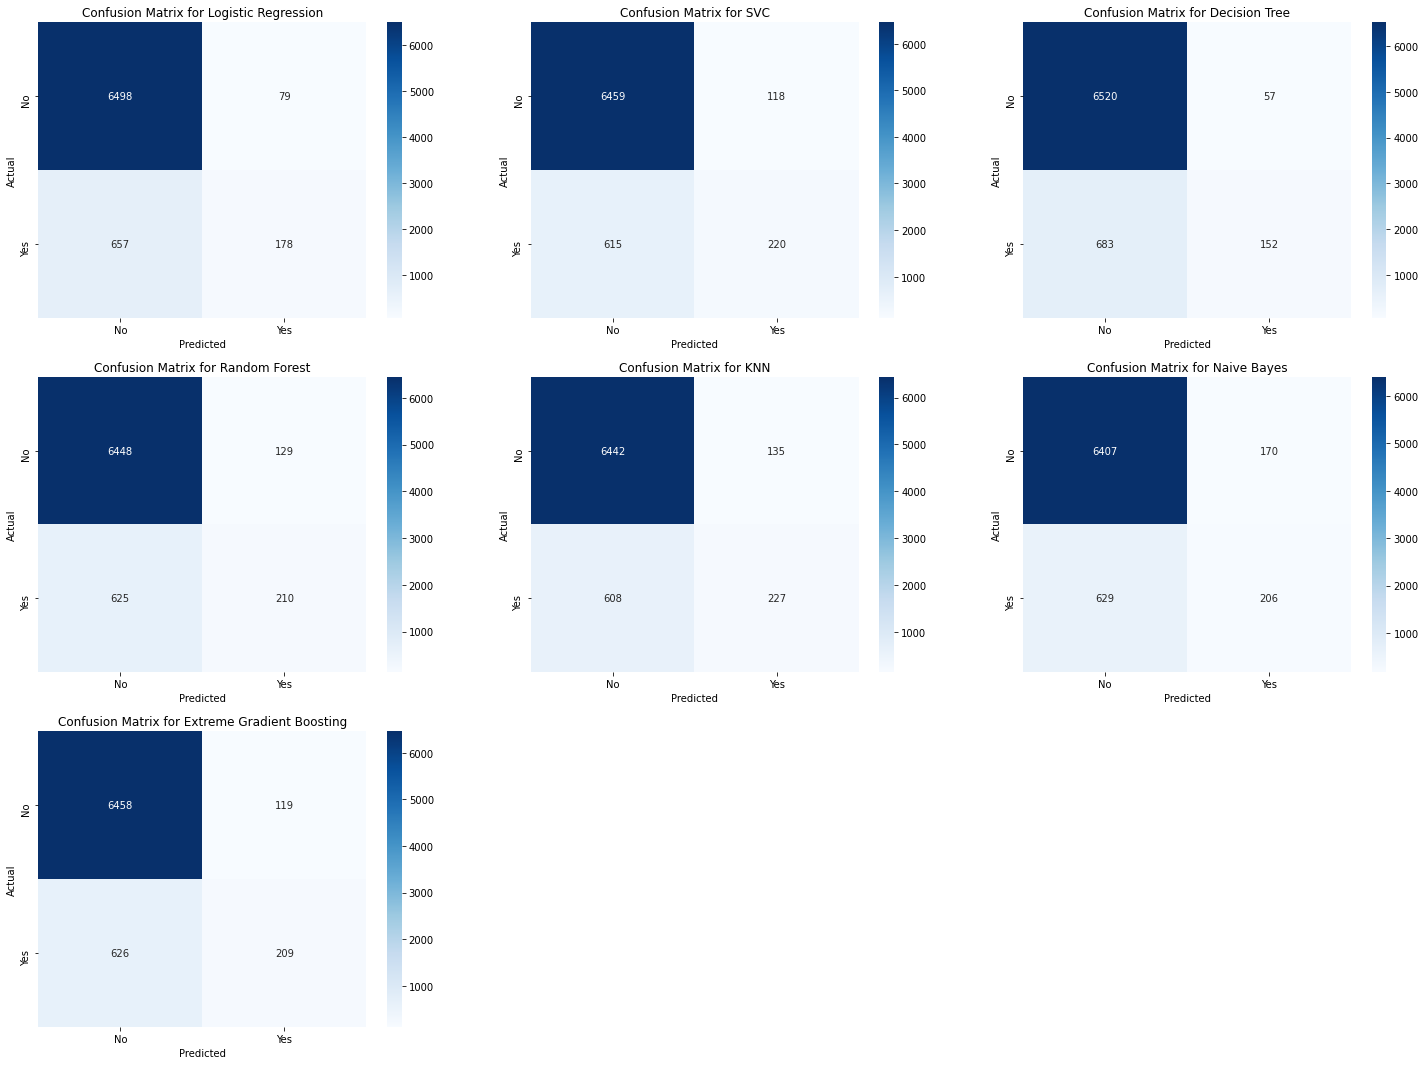

In [55]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

### ROC-AUC

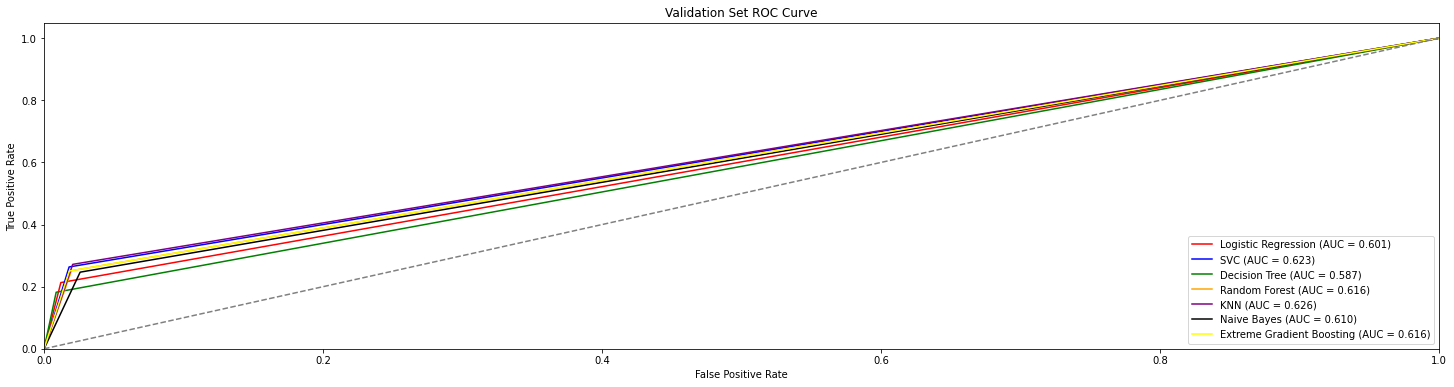

In [56]:
plt.figure(figsize=(25, 6))
plt.plot(logistic_false_positive_rate_val, logistic_true_positive_rate_val, color='red', label=f'Logistic Regression (AUC = {roc_auc_score(y_val, best_logistic.predict(X_val)):.3f})')
plt.plot(svc_false_positive_rate_val, svc_true_positive_rate_val, color='blue', label=f'SVC (AUC = {roc_auc_score(y_val, best_svc.predict(X_val)):.3f})')
plt.plot(tree_false_positive_rate_val, tree_true_positive_rate_val, color='green', label=f'Decision Tree (AUC = {roc_auc_score(y_val, best_tree.predict(X_val)):.3f})')
plt.plot(forest_false_positive_rate_val, forest_true_positive_rate_val, color='orange', label=f'Random Forest (AUC = {roc_auc_score(y_val, best_forest.predict(X_val)):.3f})')
plt.plot(knn_false_positive_rate_val, knn_true_positive_rate_val, color='purple', label=f'KNN (AUC = {roc_auc_score(y_val, best_knn.predict(X_val)):.3f})')
plt.plot(naive_false_positive_rate_val, naive_true_positive_rate_val, color='black', label=f'Naive Bayes (AUC = {roc_auc_score(y_val, best_naive.predict(X_val)):.3f})')
plt.plot(xgb_false_positive_rate_val, xgb_true_positive_rate_val, color='yellow', label=f'Extreme Gradient Boosting (AUC = {roc_auc_score(y_val, best_xgb.predict(X_val)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Evaluation Score

In [57]:
evaluations.sort_values(by='roc_auc_score', ascending=False)

,model,training_score,validation_score,macro_f1_score,roc_auc_score
4,KNN,0.906,0.900,0.662,0.626
1,SVC,0.902,0.901,0.661,0.623
3,Random Forest,0.910,0.898,0.651,0.616
6,Extreme Gradient Boosting,0.911,0.899,0.652,0.616
5,Naive Bayes,0.890,0.892,0.641,0.610
0,Logistic Regression,0.901,0.901,0.636,0.601
2,Decision Tree,0.900,0.900,0.619,0.587


### Model Analysis

Dari hasil evaluasi pada 7 model diatas dapat diketahui model dengan Tree-Based mengalami sedikit **overfitting** ini dapat dilihat pada model **Extreme Gradient Boosting** dan **Random Forest** dimana score trainingnya sedikit lebih besar dari score validationnya. Lalu, model Naive bayes mengalami sedikit **underfitting** karena score validation Naive Bayes sedikit lebih besar dari score trainingnya.

Namun, didapatkan 3 model yang memiliki performa paling baik yaitu model **K-Nearest Neighbors**, **SVC**, dan **Random Forest**. Dimana model K-Nearest Neighbors mendapat **average f1-score 0.662** dengan **ROC AUC 0.626** dimana score ini tidak berbeda jauh dengan model SVC yang mendapat **average f1-score 0.661** dengan **ROC AUC 0.623**, sedangkan untuk model Random Forest mendapat **average f1-score 0.652** dengan **ROC AUC 0.617** walaupun model ini sedikit **overfitting**. Sedangkan model dengan performa paling buruk diantara model-model lainnya adalah model **Decision Tree** yang mendapat **average f1-score 0.619** dengan **ROC AUC 0.587**.

Jika dilihat dari confusion matrix dari ketiga model tersebut, walaupun model KNN memiliki True Positive sedikit lebih banyak dari model SVC tetapi model SVC ini memiliki **Type 1 Error** (False Positive) yang jauh lebih sedikit dari model KNN. Dan untuk model Random Forest memiliki True Positive paling sedikit diantara ketiga model ini dengan **Type 2 Error** (False Negative) paling banyak.

**NOTE**: Semua model yang digunakan pada evaluasi ini adalah model dengan parameter terbaik berdasarkan grid search.

## Model Testing (Data Inference)

Pada bagian ini 3 model dengan performa paling baik akan dipilih untuk melakukan prediksi terhadap data inference.

In [67]:
df_test

,contact,month,pdays,previous,poutcome,emp_var_rate,euribor3m,nr_employed,subscribed
35624,cellular,may,999,0,nonexistent,-1.8,1.244,5099.1,0
22572,cellular,aug,999,0,nonexistent,1.4,4.964,5228.1,0
19986,cellular,aug,999,0,nonexistent,1.4,4.966,5228.1,0
25145,cellular,nov,999,0,nonexistent,-0.1,4.153,5195.8,0
561,telephone,may,999,0,nonexistent,1.1,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...
36143,cellular,may,999,0,nonexistent,-1.8,1.270,5099.1,0
10998,telephone,jun,999,0,nonexistent,1.4,4.962,5228.1,0
14183,cellular,jul,999,0,nonexistent,1.4,4.962,5228.1,0
26533,cellular,nov,999,0,nonexistent,-0.1,4.076,5195.8,0


Testing set ini berjumlah **4118 baris data**.

### Inference Prediction

Sebelum dilakukan prediksi, features dan label dari testing set ini akan dipisahkan terlebih dahulu.

In [68]:
X_test = df_test.drop(['subscribed'], axis=1)
y_test = df_test['subscribed']

Hasil prediksi dari setiap model akan langsung diubah dalam bentuk dataframe yang nantikan akan digabungkan dengan kolom `subscribed` dari testing set menjadi dataframe `preds` dengan kolom sebagai berikut:
- `Actual` adalah nilai sebenarnya
- `SVC` adalah hasil prediksi dari model **Support Vector Classifier**
- `Forest` adalah hasil prediksi dari model **Random Forest**
- `KNN` adalah hasil prediksi dari model **K-Nearest Neighbors**

In [69]:
svc_pred = pd.DataFrame(best_svc.predict(X_test))
forest_pred = pd.DataFrame(best_forest.predict(X_test))
knn_pred = pd.DataFrame(best_knn.predict(X_test))

preds = pd.concat([df_test['subscribed'].reset_index(drop=True), svc_pred, forest_pred, knn_pred], axis=1)
preds.columns = ['Actual', 'SVC', 'Forest', 'KNN']

# Showing the top 20 rows of the predictions dataframe where actual values are 1
preds[preds.Actual == 1].head(20)

,Actual,SVC,Forest,KNN
5,1,0,0,0
12,1,1,0,0
16,1,0,0,0
17,1,0,0,0
33,1,0,0,0
40,1,0,0,0
44,1,0,0,0
46,1,0,0,0
54,1,0,0,0
56,1,0,1,1


Membuat dataframe `testing` yang menyimpan score dari setiap model terhadap testing set.

In [70]:
testing = pd.DataFrame(columns=['model', 'testing_score', 'macro_f1_score', 'roc_auc_score'])

testing.loc[0] = ['SVC', best_svc.score(X_test, y_test), f1_score(y_test, best_svc.predict(X_test), average='macro'), roc_auc_score(y_test, best_svc.predict(X_test))]
testing.loc[1] = ['Random Forest', best_forest.score(X_test, y_test), f1_score(y_test, best_forest.predict(X_test), average='macro'), roc_auc_score(y_test, best_forest.predict(X_test))]
testing.loc[2] = ['KNN', best_knn.score(X_test, y_test), f1_score(y_test, best_knn.predict(X_test), average='macro'), roc_auc_score(y_test, best_knn.predict(X_test))]

Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` untuk setiap model untuk testing set.

In [71]:
svc_false_positive_rate, svc_true_positive_rate, svc_thresholds = roc_curve(y_test, best_svc.predict(X_test))
forest_false_positive_rate, forest_true_positive_rate, forest_thresholds = roc_curve(y_test, best_forest.predict(X_test))
knn_false_positive_rate, knn_true_positive_rate, knn_thresholds = roc_curve(y_test, best_knn.predict(X_test))

Melakukan plotting ROC pada setiap model untuk testing set.

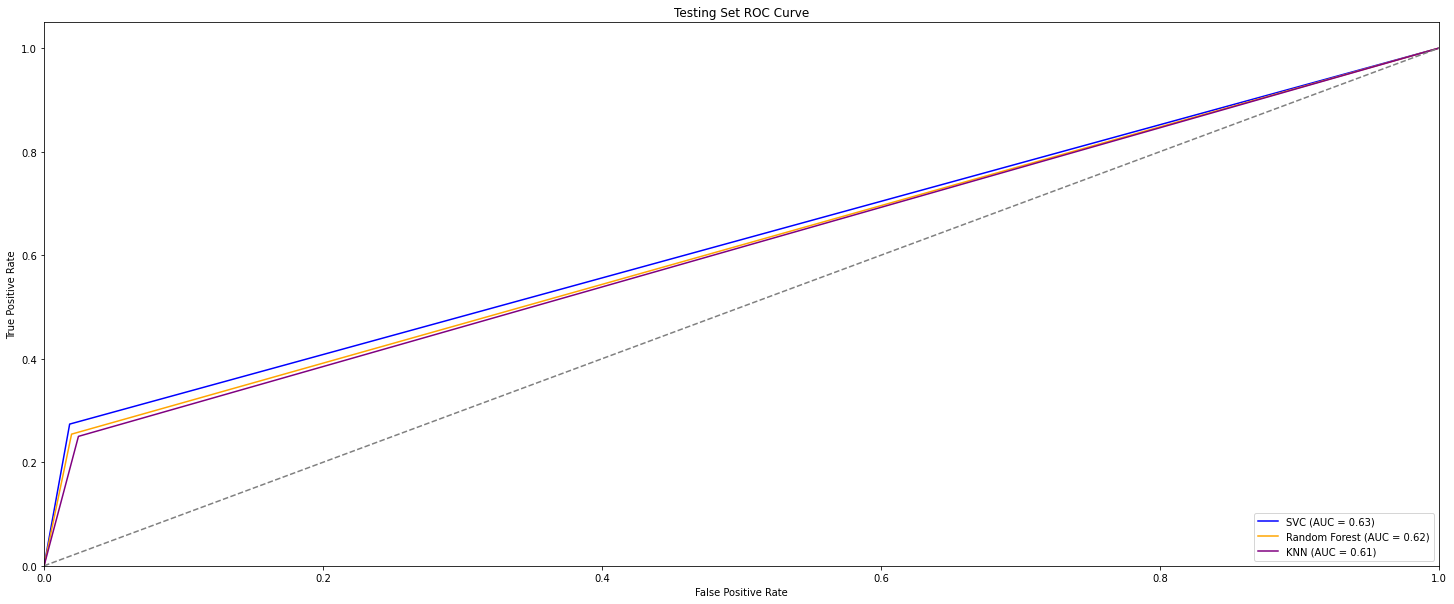

In [72]:
plt.figure(figsize=(25, 10))
plt.plot(svc_false_positive_rate, svc_true_positive_rate, color='blue', label=f'SVC (AUC = {(roc_auc_score(y_test, best_svc.predict(X_test))):.2f})')
plt.plot(forest_false_positive_rate, forest_true_positive_rate, color='orange', label=f'Random Forest (AUC = {(roc_auc_score(y_test, best_forest.predict(X_test))):.2f})')
plt.plot(knn_false_positive_rate, knn_true_positive_rate, color='purple', label=f'KNN (AUC = {(roc_auc_score(y_test, best_knn.predict(X_test))):.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Set ROC Curve')
plt.show()

In [73]:
testing.sort_values(by='roc_auc_score', ascending=False)

,model,testing_score,macro_f1_score,roc_auc_score
0,SVC,0.901894,0.666353,0.627685
1,Random Forest,0.898494,0.652863,0.617303
2,KNN,0.893638,0.644189,0.612685


## Conclusion

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan 7 model klasifikasi yang berbeda ini adalah:

Dataset yang digunakan ini adalah dataset terkait kampanye pemasaran deposito oleh pihak bank kepada kliennya. Pihak bank melakukan kampanye selama **10 bulan** mulai dari bulan Maret hingga bulan Desember setiap hari senin hingga hari jumat yang puncaknya berada pada bulan **Mei**. Pada dataset ini jumlah klien yang berlanganan deposito hanya sekitar 11% saja. 

Pihak bank menghubungi para kliennya dengan menggunakan telepon seluler dan telepon rumah, dan nampaknya telepon seluler ini cukup efektif untuk membuat klien menjadi berlangganan deposito yang ditawarkan dengan persentase berlangganannya sebesar **14.7%** sedangkan untuk klien yang dibuhungi menggunakan telepon rumah hanya **5.2%** saja, lamanya pihak bank menghubungi setiap klienya rata-rata berdurasi **258 detik** atau sekitar 4 menit dimana klien yang berlangganan deposito **berdurasi lebih** lama dari yang tidak berlangganan, namun pada keterangan kolom dataset disebutkan bahwa kolom `duration` ini sangat mempengaruhi outputnya dimana jika **duration = 0** maka outputnya akan **no**, tetapi jika pihak bank tidak menghubungi klien mereka tidak akan pernah mengetahui outputnya akan berlangganan atau tidak.

Ada sebanyak **86.34%** outcome dari kampanye sebelumnya tidak tertera atau **nonexistent** dan ada **96.32%** klien yang tidak dihubungi oleh pihak bank pada kampanye sebelumnya, dan ternyata klien-klien dengan outcome nonexistent ini disebabkan karena mereka tidak dihubungi oleh pihak bank pada kampanye sebelumnya. Karena hilangnya data ini tidak random, maka kolom-kolom ini akan tetap digunakan sebagai features untuk melatih model.

Setelah dilakukan **EDA** dan dilihat korelasi antara tiap feature terhadap labelnya, kolom-kolom yang akan digunakan sebagai features adalah `contact`, `month`, `pdays`, `previous`, `poutcome`, `emp_var_rate`, `euribor3m`, dan `nr_employed`. Lalu didapatkan 3 model klasifikasi dengan performa paling baik diantara 4 model lainnya yaitu:
- **K-Nearest Neighbors** dengan average **f1-score 0.662** dan **ROC AUC 0.626**
- **Support Vector Classifier** dengan average **f1-score 0.661** dan **ROC AUC 0.623**
- **Random Forest** dengan average **f1-score 0.652** dan **ROC AUC 0.617**

Maka ketiga model tersebut yang akan digunakan untuk memprediksi data inference, dan didapatkan model Support Vector Classifier yang memiliki performa paling baik saat diuji menggunakan data inference. Jadi, di antara 7 model yang dibuat model klasifikasi yang **paling baik** untuk dataset yg digunakan ini adalah model **Support Vector Machine** dengan hyperparameter sebaga berikut:
- C = **1**
- gamma = **auto**
- kernel = **rbf**

**NOTE**: Outlier pada features dibiarkan karena saat dilakukan penghapusan dan capping semua model mengalami **overfitting**.